## Computer Vision(CS 436, CS5310, EE513) Programming Assignment#2

###  In this part of assignment you'll be determining the intrinsic and extrinsic parameters of a your mobile phone camera using camera calibration techniques. 
### Undergrad students have to strictly follow the handout and implement the procedure outlined in the handout. Grad students can follow the handout and get full marks but they are free to experiment and they can look at other ways of finding the projection matrix but keep in mind that you are not allowed to copy code or pictures, the picture you use for calibration should be your own and should be taken from you own mobile phone camera. You should be able to explain every step of your implementation.
### For this assignment we are using the direct linear transformation method

In [0]:
#Imports
import matplotlib
import cv2
import math
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib import image as mpimg
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap
import scipy
%matplotlib inline

## Part 1 (30 marks for undergrad)
### Take image of a calibration object with your camera phone. Unlike shown in the lecture slides here you are required to choose an appropriate 3D calibration object (i.e. a nonplanar object, a rubiks cube for example) so that the world points on that object span a 3-dimensional space, and the image points are easy to mark. Place the calibration object on a horizontal plane, such as a tabletop, or floor, to take the image. Mark at least 20 image points as carefully as possible and establish their world coordinates in millimeters. 
### From this data, compute the camera matrix P. Show the original points and the back-projected camera points on a single image and compute the average re-projection error.

(4608, 3456, 3)
12.801094797486902


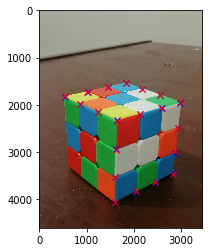

In [0]:
#TODO
rubix = np.array(mpimg.imread('r.jpg'))
rubix.setflags(write=1)

xy_coordinates = np.array([(1646,2333),(2135,2199),(2592,2067),(2987,1955),(2565,1795),(2170,1658),(1838,1536),(1465,1625),(1022,1724),(549,1839),(854,1983),(1239,2145),(1634,2933),(1594,3529),(1600,4056),(2044,3847),(2479,3629),(2824,3448),(2878,3018),(2932,2484)])
x = []
y = []

print(rubix.shape)
implot = plt.imshow(rubix)
for i in range (len(xy_coordinates)):
  for j in range(1):
    x.append(xy_coordinates[i][j])
    y.append(xy_coordinates[i][j+1])
  
td_coordinates = np.array([(0,0,0),(1,0,0),(2,0,0),(3,0,0),(3,1,0),(3,2,0),(3,3,0),(2,3,0),(1,3,0),(0,3,0),(0,2,0),(0,1,0),(0,0,1),(0,0,2),(0,0,3),(1,0,3),(2,0,3),(3,0,3),(3,0,2),(3,0,1)])

three_d_coordinates = np.dot(td_coordinates,18)

X = []
Y = []
Z = []

#separating X Y Z coordinates
for i in range (len(three_d_coordinates)):
  for j in range(1):
    X.append(three_d_coordinates[i][j])
    Y.append(three_d_coordinates[i][j+1])
    Z.append(three_d_coordinates[i][j+2])

plt.plot(x,y,'bx')

#compute A matrix
A = []
for i in range (len(xy_coordinates)):
    A.append([X[i],Y[i],Z[i],1,0,0,0,0,-x[i]*X[i],-x[i]*Y[i],-x[i]*Z[i],-x[i]])
    A.append([0,0,0,0,X[i],Y[i],Z[i],1,-y[i]*X[i],-y[i]*Y[i],-y[i]*Z[i],-y[i]])

# print(A)

# Compute camera projection matrix P
# [U S V] = svd(A);
u,s,vh = np.linalg.svd(A, full_matrices= True)

P = vh[-1]
P = [P[0:4],P[4:8],P[8:12]]
# print("p ",P)

# print(ans)
# print(P)
# final_x = P * XYZ
final_X = []
for i in range (len(xy_coordinates)):
  final_X.append([X[i],Y[i],Z[i],1])
# print(final_X)

# x = P X
result = []
for i in range(len(final_X)):
  result.append(np.matmul(P,final_X[i]))
# print(result)

final_resultx = []
final_resulty = []
for i in range (len(result)):
  for j in range (1):
   final_resultx.append(result[i][j]/result[i][j+2])
   final_resulty.append(result[i][j+1]/result[i][j+2])
# print(ans)
# print(final_result)
plt.plot(final_resultx,final_resulty,'rx')

final_result = []
sum = 0
for i in range(len(xy_coordinates)):
  xerror = (final_resultx[i]-x[i])**2
  yerror = (final_resulty[i]-y[i])**2

  final_result.append(math.sqrt(xerror+yerror))
  sum = sum + math.sqrt(xerror+yerror)

print(sum/len(xy_coordinates))
# print(final_result)
# print(avg)
# print(errorx,errory)

## Part 2 (10 marks)
### Since we are using direct linear transformation, you are required to implement QR decomposition of a matrix

In [0]:
# TODO
#function already exist
import scipy.linalg 
# r, q = scipy.linalg.rq(P)
# print(r,q)

## Part 3 (30 marks)
### Compute camera center C, intrinsic matrix K and Rotation matrix R. Generate a 3D figure which shows the calibration points, the camera center and the orientation of the camera in 3D (You also have to plot the points for 3d calibration object as well)

[-1.09855358e-06 -1.23761593e-06 -7.19200228e-07 -3.49312376e-04]
Plane is :  [-1.09855358e-06 -1.23761593e-06 -7.19200228e-07 -3.49312376e-04]


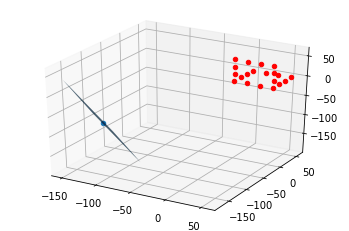

In [0]:
#TODO
# Find camera center C
# U,S,V = np.linalg.svd(P, full_matrices= True)
# C = V[:,len(V)-1]
# cam_center = []

# cam_center = C/C[3]
# for i in range(len(C)):
#   cam_center.append(C[i]/C[3]) #normalization
C = scipy.linalg.null_space(P)
cam_center = C/C[-1]

# print(cam_center)

P = np.array(P)
#intrinsic paramter k
KR = P[0:3, 0:3]
k,R = scipy.linalg.rq(KR)
# print("K value: ", k)
i_para = []
org_k = k
# i_para = k/k[2][2]
for i in range(len(k)):
    i_para.append(k/k[2][2]) #normalize
i_para = np.array(i_para)
# print("K is : ", k[2][2])
# print("Intrinsic parameter K: ", i_para)

# print("Rotation Matrix: R ", np.array(R))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(cam_center[0],cam_center[1],cam_center[2])
for i in range (len(three_d_coordinates)):
    ax.scatter3D(three_d_coordinates[i][0],three_d_coordinates[i][1],three_d_coordinates[i][2], color = 'r')
  # print(three_d_coordinates[i][0],three_d_coordinates[i][1],three_d_coordinates[i][2])

plane = P[2]
print(P[2])
print("Plane is : ", P[2])
plane = plane / plane[-1]
a,b,c,d = plane

xx,yy = np.meshgrid(range(70),range(70))
xx = xx + cam_center[0]-35
yy = yy + cam_center[1]-35
z = (-a * xx - b*yy - d)*1. /c
ax.plot_surface(xx,yy,z)

## Part 4 (20 marks)
### Search for the sensor information of your camera on the web. From this information, compute the focal length in mm. The following link may be useful to look up sensor sizes in mm(since most smartphone sensor sizes will be quoted in inches):
https://www.digicamdb.com/sensor-sizes/
### now re-plot everything along with the principal point of camera

[[-1.32134790e-02  6.35232113e-05  3.25344075e-03]
 [ 0.00000000e+00 -1.32748837e-02  4.53140731e-03]
 [ 0.00000000e+00  0.00000000e+00  1.80437306e-06]]
0.013274883665285985   1.8043730561433156e-06
[1 0 0 0]
[-1.09855358e-06 -1.23761593e-06 -7.19200228e-07 -3.49312376e-04]


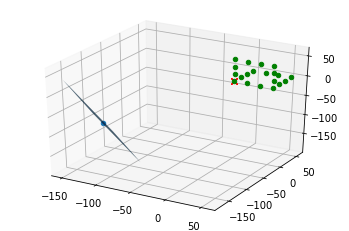

In [0]:
#TODO
# print(k)
print(org_k)
mxf = abs(org_k[1][1])
myf = abs(org_k[2][2])

print(mxf," ", myf)

#finding the dimension of the camera sensor (Huawei Nova 3i)
#PDAF sensor(is for auto focus-lol) in it and CMOS sensors hotay.
sx = 5.16
sy = 3.87
sensor_size = [sx,sy]
image_size = rubix.shape
image_x = image_size[0]
image_y = image_size[1]

mx = image_x/sx #in pix/mm
my = image_y/sy 

mx = mx/100 #mm-conversion
my = my/100

focal_length = [mx,my] #in mm
# print("Principle point is: ", focal_length)

#now compute principle point

#The principal point is the point on the image plane onto which the perspective 
#center is projected. It is also the point from which the focal length of the 
#lens is measured.

#The principal points are the points where the principal planes cross the optical axis. 

# print(np.array(P))
inf_pt = np.array([1,0,0,0])
inf_pt_t = inf_pt.transpose()
print(inf_pt_t)

focal_pt = []
for i in range(len(P)):
  focal_pt.append(np.matmul(P,inf_pt_t))
focal_pt = np.array(focal_pt)
# print("focal points : ", focal_pt)

px = []
py = []
pz = []
for i in range(len(focal_pt)-1):
  px.append(focal_pt[i])
  py.append(focal_pt[i+1])
  
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.scatter3D(cam_center[0],cam_center[1], cam_center[2])

for i in range (len(three_d_coordinates)):
  ax.scatter3D(three_d_coordinates[i][0],three_d_coordinates[i][1],three_d_coordinates[i][2],color='g')

# print("px",np.array(px))
# implot = plt.imshow(rubix)
# plt.plot(px,py,'-')

plane = P[2]
print(P[2])
# print("Plane is : ", P[2])
plane = plane / plane[-1]
a,b,c,d = plane
plt.plot(px,py,'xr')
xx,yy = np.meshgrid(range(70),range(70))
xx = xx + cam_center[0]-35
yy = yy + cam_center[1]-35
z = (-a * xx - b*yy - d)*1. /c
ax.plot_surface(xx,yy,z)

## Part 5 (10 marks)
### Suggest a few ways to minimize the error in this whole procedure. Since you are suggesting these, go back and try repeating/tweaking the whole algorithm and see if the things you suggest actually have an impact on the solution (it is perfectly fine if your propositions are not resulting in anything positive) (Suggest at least 2)

In [0]:
# your answer/code goes here
'''
1.Previously i took 20 points, but now when i take more than 20 points (23points), the error reduces to 12.8 to 10.1
2.Image lightening is not perfect, what i can do is to reupload an image with better lightening so i can 
 get a better result.
3.The cornors of Rubix cube were not sharp enough due to which there could be an error, like 
  for example the corners are bit round and i have to take each point very carefully, but due to parallex error 
  things could go wrong.
'''

## Part 6 (Grad Only, 20 marks for this part)(Upto 10 marks bonus for Undergrads)
### Look up the existing ways of camera calibration and draw a comparisons between the one you've implemented above. While comparing the two algorithms, you should be able the explain the computation/space complexity of the two algorithms, the assumptions that are kept in both algorithms and under what circumstances each would fail. You should also explain the equations involved in both algorithms.
### In case you have opted for not following the handout (i.e looking up and implementing your own algo) you can draw comparison between the algorithm that you've written and the one proposed in the handout (DLT)

In [0]:
# your answer goes here
# Once finding the cornors manually, we can increase their accuracy using cv2.cornerSubPix(). 
